In [1]:
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np

In [2]:
from global_variable import *

In [3]:
with open('sensornew.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())

In [4]:
def calculate_Pdp_positions(length_of_grid,transmission_range):
    pdp_positions={}
    k=0
    for c_1 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
        for c_2 in np.arange(length_of_grid/(transmission_range*math.sqrt(2))):
            pdp_positions[k]=(c_1*transmission_range*math.sqrt(2),c_2*transmission_range*math.sqrt(2))
            k=k+1
    return pdp_positions

In [5]:
pdp_positions=calculate_Pdp_positions(length_of_grid,transmission_range)

In [6]:
def distance(points,i,j):
    x=points[i][0]-points[j][0]
    y=points[i][1]-points[j][1]
    return math.sqrt(x*x+y*y)

In [7]:
def create_trip_graph():
    G=nx.Graph()
    distance_between_pdp={}
    k=0
    for i in range(len(pdp_positions)):
        G.add_node('pdp{}'.format(i),pos=pdp_positions[i])
    for u in range(len(pdp_positions)):
        for v in range(len(pdp_positions)):
            wt=distance(pdp_positions,u,v)
            G.add_edge('pdp{}'.format(u),'pdp{}'.format(v),weight=wt)
            distance_between_pdp[(u,v)]=wt
            k=k+1
    return G,distance_between_pdp

In [8]:
trip_graph,distance_between_pdp=create_trip_graph()

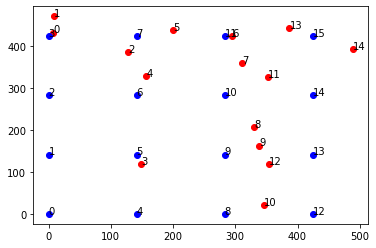

In [9]:
for i in range(len(sensor)):
    plt.scatter(sensor[i][0],sensor[i][1],c='r')
    plt.annotate(i,(sensor[i][0],sensor[i][1]))
for j in range(len(pdp_positions)):
    plt.scatter(pdp_positions[j][0],pdp_positions[j][1],c='b')
    plt.annotate(j,(pdp_positions[j][0],pdp_positions[j][1]))

In [10]:
def threshold_distance_inside_sensor_range():
    trs=(data_stored/bandwidth)*drone_speed
    return trs

In [11]:
trs=threshold_distance_inside_sensor_range()
print(trs)

2.5


In [12]:
Dmov=[]


In [13]:
# def check_distance_between_a_point_line(init,final):
#     for i in range(len(sensor)):
#         vect_int_fin=[0 ,0]
#         vect_int_fin[0]=pdp_positions[final][0]-pdp_positions[init][0]
#         vect_int_fin[1]=pdp_positions[final][1]-pdp_positions[init][1]
        
#         vect_int_point=[0,0]
#         vect_int_point[0]=sensor[i][0]-pdp_positions[init][0]
#         vect_int_point[1]=sensor[i][1]-pdp_positions[init][1]
        
#         vect_final_point=[0,0]
#         vect_final_point[0]=sensor[i][0]-pdp_positions[final][0]
#         vect_final_point[1]=sensor[i][1]-pdp_positions[final][1]
        
#         dot_product_point_final=(vect_int_fin[0]*vect_final_point[0])+(vect_int_fin[1]*vect_final_point[1])
#         print(dot_product_point_final)
#         if dot_product_point_final==0:
#             print (i)
# #         print(dot_product_point_final)
# #         #print()
# #         dot_product_point_init=(vect_int_fin[0]*vect_int_point[0])+(vect_int_fin[1]*vect_int_point[1])
# #         print(dot_product_point_init)
# #         if  not dot_product_point_final  >=0 and dot_product_point_init<=0:
# #             print (i)
            

    

In [14]:
# for i in range(len (sensor)):
    
#     A=sensor[i][0]-pdp_positions[0][0]
#     B=sensor[i][1]-pdp_positions[0][1]
#     C=pdp_positions[10][0]-pdp_positions[0][0]
#     D=pdp_positions[10][1]-pdp_positions[0][1]
#     dot=A*C+B*D
#     #print(dot)
#     len_sq=C*C+D*D
#     #print(len_sq)
#     param=dot/len_sq
#     #print(param)
#     if param<1 and param >0:
#         xx=pdp_positions[0][0]+param*C
#         yy=pdp_positions[0][1]+param*D
        
#         dist= math.sqrt((sensor[i][0]-xx)**2+(sensor[i][1]-yy)**2)
#         if dist<200:
#             print(i)
#             print(xx,yy)
#             print(dist)
# #         dsi=2*(math.sqrt(abs(200**2-dist**2)))
# #         if dsi>=trs:
# #             print(i)
            
        
        
        
    

In [15]:
def sensor_that_can_send_data_while_moving(init,final):
    
    sensor_that_can_send_data_whilmoving={}
    for i in range (len(sensor)):
        p1=np.array(pdp_positions[init])
        p2=np.array(pdp_positions[final])
        p3=np.array(sensor[i])
        #dot=np.dot(p3-p1,p2-p1)
        check=np.dot(p3-p1,p2-p1)/(np.linalg.norm(p2-p1))**2 #here to check whether the point representing the sensor will be 
                                                            #perpendicular to the line representing two pdp points i calculated the check
        #print(check)

        dist=abs(np.cross(p3-p1,p2-p1)/np.linalg.norm(p2-p1)) #this is perpencicular distance between the sensor point and the line of two pdp
        if check<1 and check>0:#here i checked whether the point representing the sensor will be 
                                                            #perpendicular to the line representing two pdp points
            if dist<200:
                dsi=2*(math.sqrt(abs(transmission_range**2-dist**2)))
                if dsi>=trs:
                    project=np.dot(p3-p1,p2-p1)/np.linalg.norm(p2-p1)
                    first_cutpoint=project-dsi/2   #its the distance from initial point to the first cutpoint
                    final_cutpoint=project+dsi/2   #its the distance from initial pdp point to the 
                    sensor_that_can_send_data_whilmoving[i]=first_cutpoint,final_cutpoint
                    sorted_dict=dict(sorted(sensor_that_can_send_data_whilmoving.items(), key=lambda item: item[1]))
    return(sorted_dict)







        #print(dist)
        #print(project)
        #print("******")
        #print(dot)
    

In [16]:
sensor_that_can_send_data_whilmoving=sensor_that_can_send_data_while_moving(0,10)

In [20]:
sensor_that_can_send_data_whilmoving

{3: (91.78051592953445, 287.2287187864551),
 12: (201.74941310136705, 467.17360190110696),
 2: (210.86848265724583, 516.0372884025251),
 4: (274.42962245715506, 412.8781688561692),
 9: (281.37359868889405, 427.1473960600266),
 8: (330.3655562957225, 429.0671266986295)}

In [17]:
pdp_positions[10]

(282.842712474619, 282.842712474619)

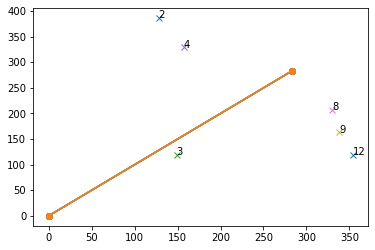

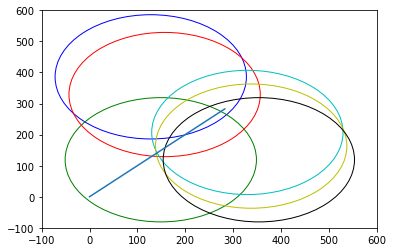

In [18]:


circle=[]
color=['b','g','r','c','y','k']
s=0
for i in range(len(sensor)):
    for k,v in sensor_that_can_send_data_whilmoving.items():
        if i==k:
            circle.append(plt.Circle((sensor[i][0],sensor[i][1]),200,color=color[s],fill=False))
            plt.plot(sensor[i][0],sensor[i][1],marker='x')
            plt.annotate(i,(sensor[i][0],sensor[i][1]))
            plt.plot([0, 282.842712474619], [0,282.842712474619],marker='o' )
            s=s+1

    
    
fig,ax=plt.subplots()
ax.set_xlim((-100, 600))
ax.set_ylim((-100,600))
for i in range(len(circle)):
    ax.add_artist(circle[i])

plt.plot([0, 282.842712474619], [0,282.842712474619] )
plt.show()


#plt.gca().set_aspect()
    

In [19]:
sensor

NameError: name 'sorted_dict' is not defined

In [ ]:
# check_distance_between_a_point_line(0,10)

In [ ]:
# vect_int_fin=[0, 0]
# print(vect_int_fin)

In [ ]:
# def check_sensor_can_send_data_while_moving(init,final,sensor,Dmov):
#     """function to check whether the sensor can send data while drone is moving"""
#     sensor1=sensor
#     dsubset=[]
#     p1=np.array(pdp_positions[init])
#     p2=np.array(pdp_positions[final])
#     for i in range(len(sensor1)):
#         p3=np.array(sensor1[i])
#         d=np.cross(p2-p1,p3-p1)/np.linalg.norm(p2-p1)
#         print(d)
#         dsi=2*(math.sqrt(abs(transmission_range**2-d**2)))
#         print(dsi)
#         if dsi>=threshold_distance_inside_sensor_range():
# #             if i not in Dmov:
# #                 dsubset.append(i)
#             print (i)
        
#    # Dmov=Dmov+list(check_overlapping(init,final,dsubset))
#    # return Dmov


In [ ]:
# check_sensor_can_send_data_while_moving(0,10,sensor,Dmov)

In [ ]:
# def check_overlapping(pdp_init,pdp_final,sensor=sensor,radius=transmission_range):
#     """function to check the overlapping sensor"""
#     l={}
#     distance_of_line_connecting_two_pdp=distance_between_pdp[pdp_init,pdp_final]
#     #compute direction vector of line connecting two pdp
#     Dx=(pdp_positions[pdp_final][0]-pdp_positions[pdp_init][0])/distance_of_line_connecting_two_pdp
#     print(Dx)
#     Dy=(pdp_positions[pdp_final][1]-pdp_positions[pdp_init][1])/distance_of_line_connecting_two_pdp
#     print(Dy)
#     for i in range(len(sensor)) :
        
#         t=Dx*(sensor[i][0]-pdp_positions[pdp_init][0])+Dy*(sensor[i][1]-pdp_positions[pdp_init][1])
#         Ex=t*Dx+pdp_positions[pdp_init][0]
#         Ey=t*Dy+pdp_positions[pdp_init][1]
#         LEC=math.sqrt((Ex-sensor[i][0])**2+(Ey-sensor[i][1])**2)
#         if(LEC)<radius:
# #             dt=math.sqrt(radius**2-LEC**2)
# #             #calculate the first intersection point
# #             Fx=(t-dt)*Dx+pdp_positions[pdp_init][0]
# #             Fy=(t-dt)*Dy+pdp_positions[pdp_init][1]
# #             #calculate the second intersection point
# #             Gx=(t+dt)*Dx+pdp_positions[pdp_init][0]
# #             Gy=(t+dt)*Dx+pdp_positions[pdp_init][1]
# #             l[i]=(Fx,Fy),(Gx,Gy)
#             l[i]=i
#             print(i)    
#     return(l)